In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

var1


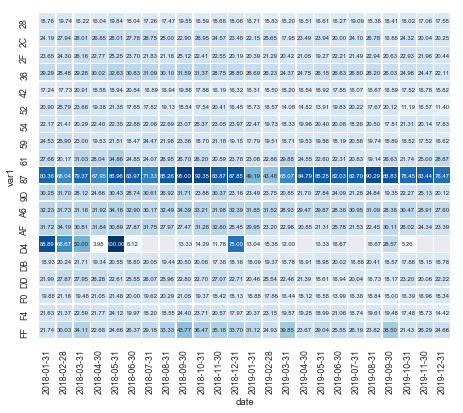

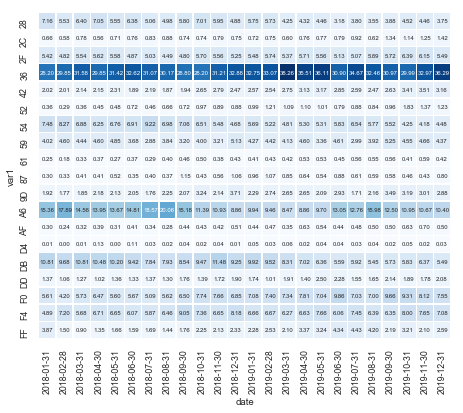

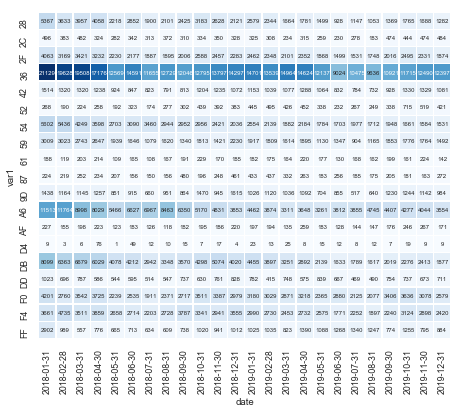

var2


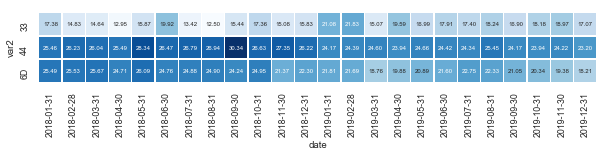

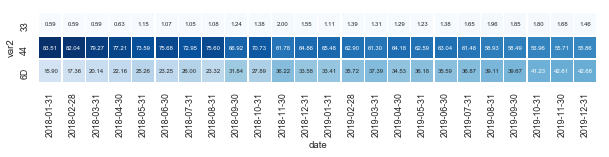

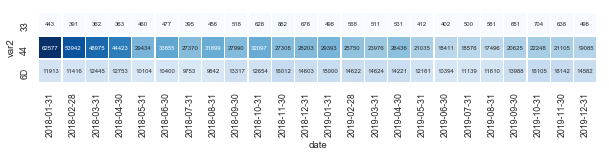

var3


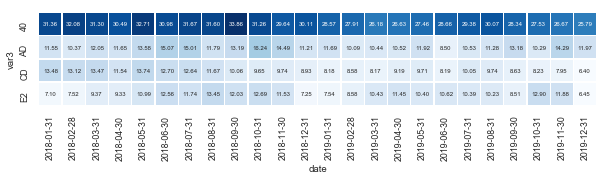

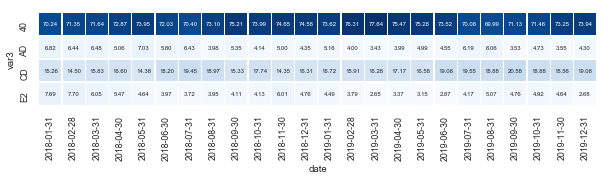

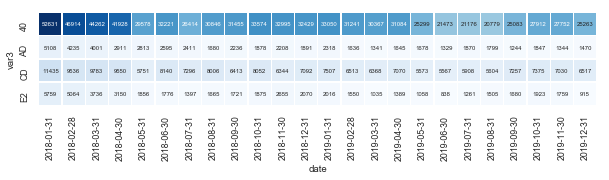

var4


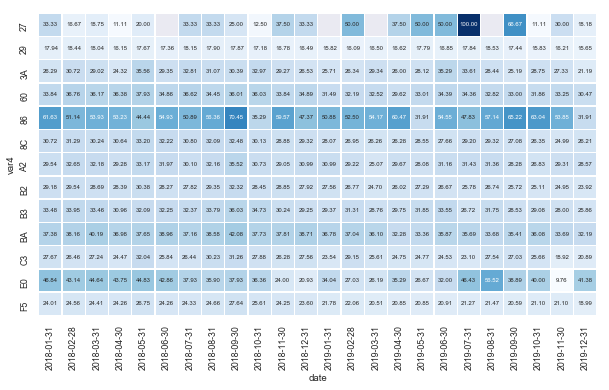

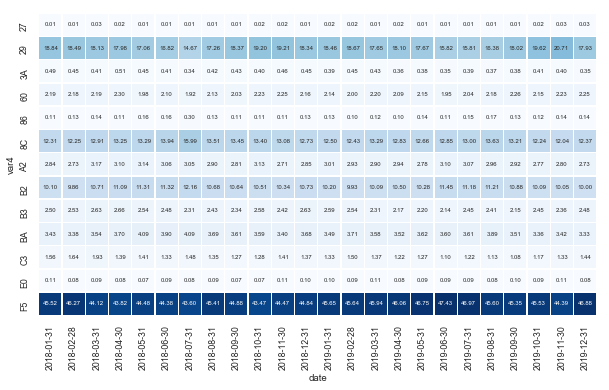

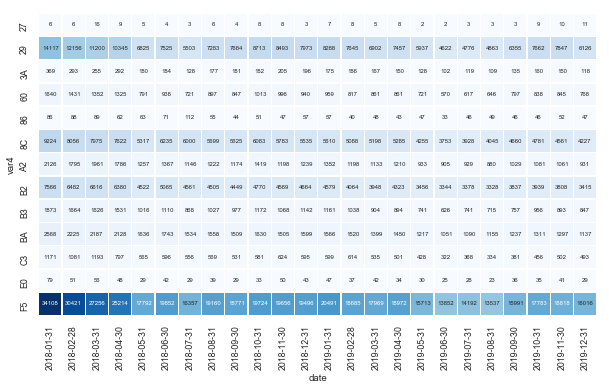

var5


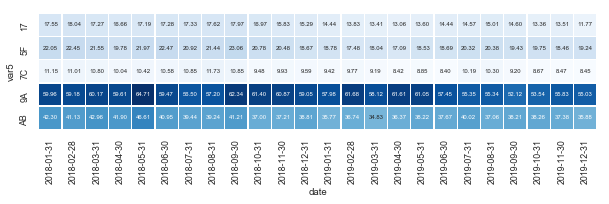

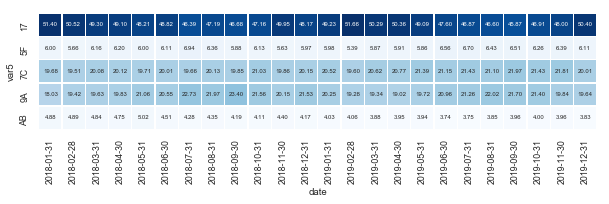

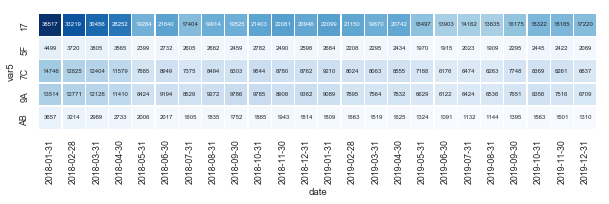

var6


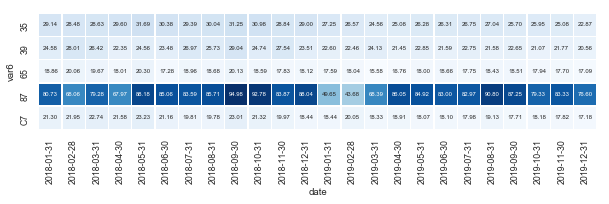

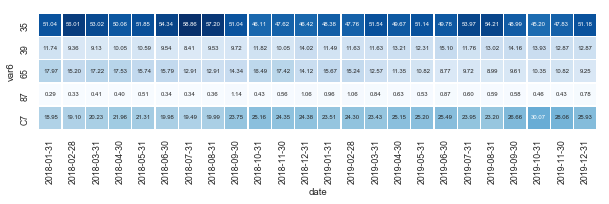

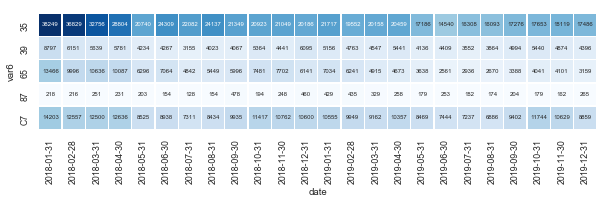

var8


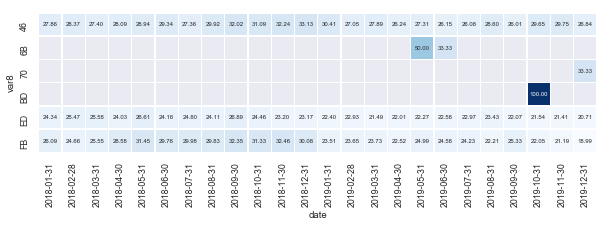

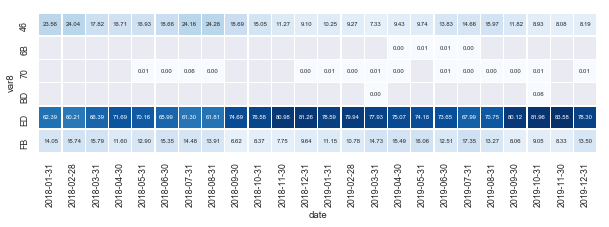

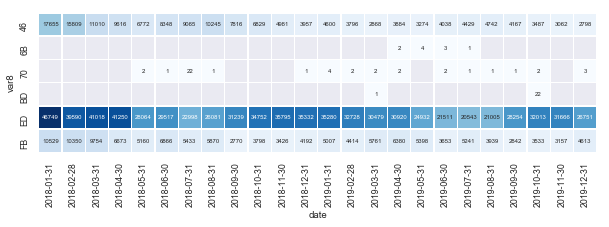

var1


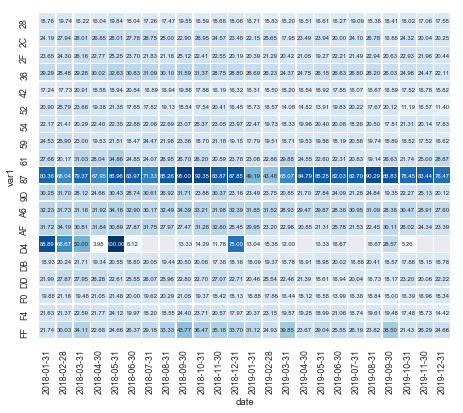

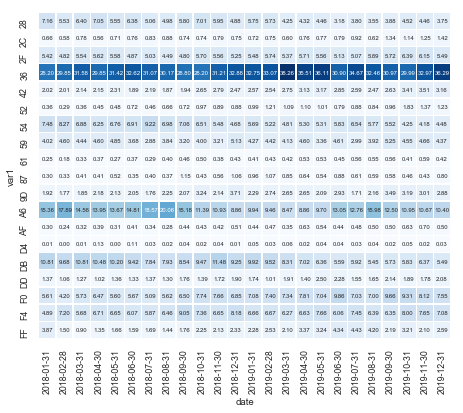

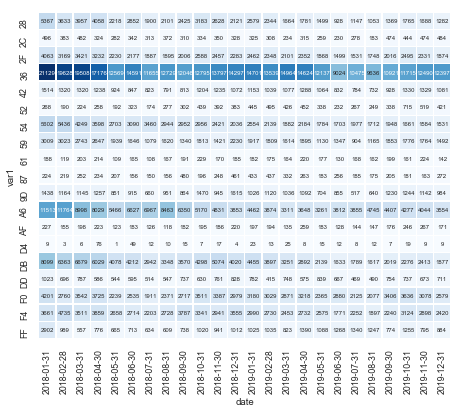

var2


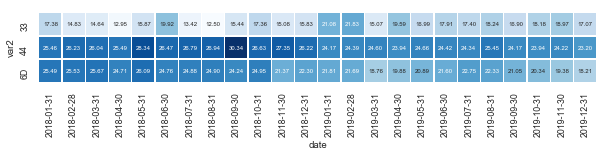

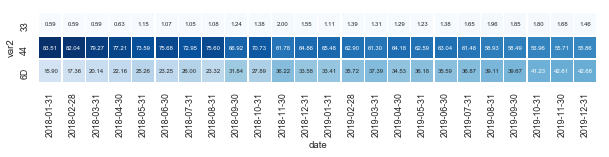

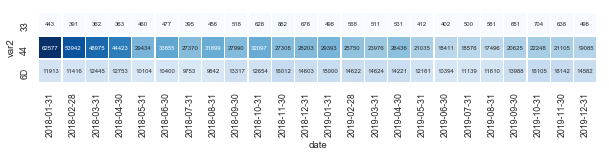

var3


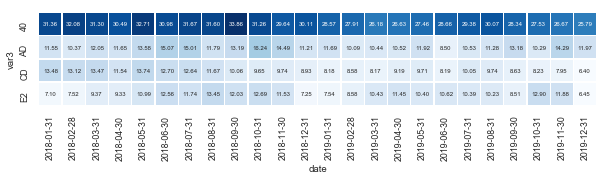

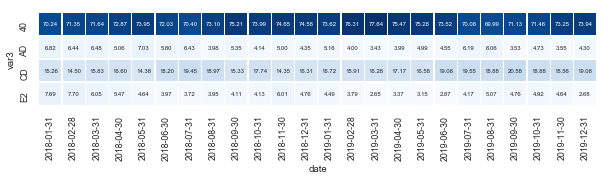

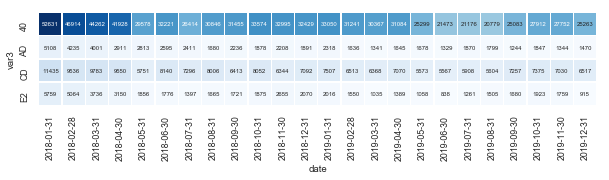

var4


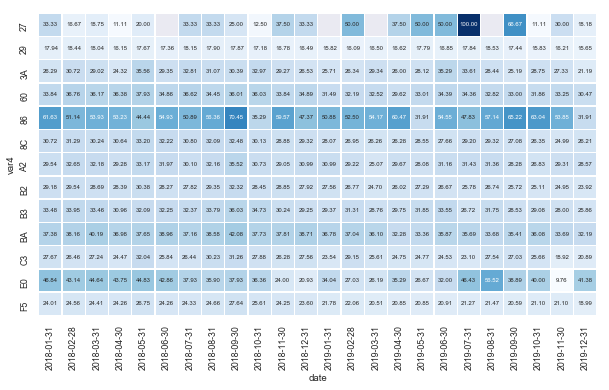

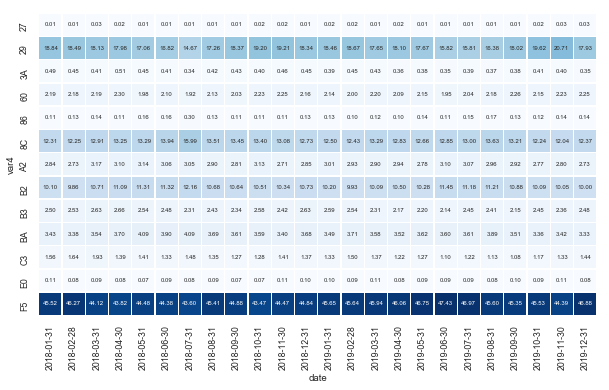

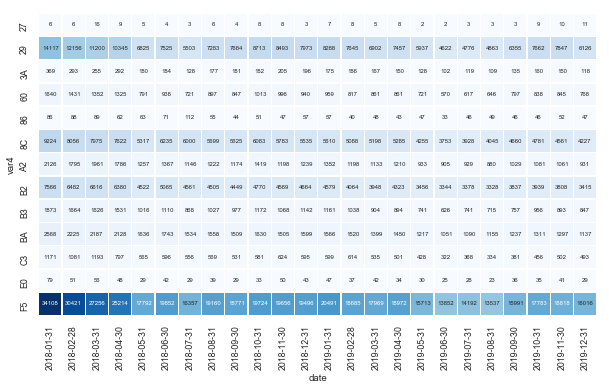

var5


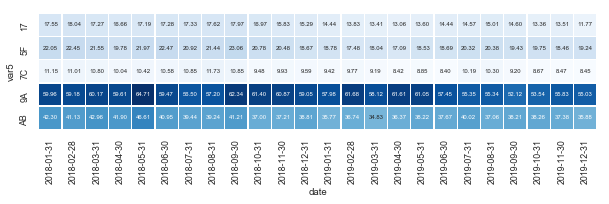

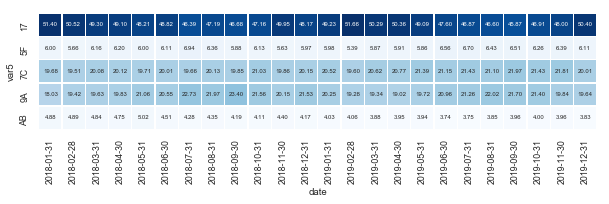

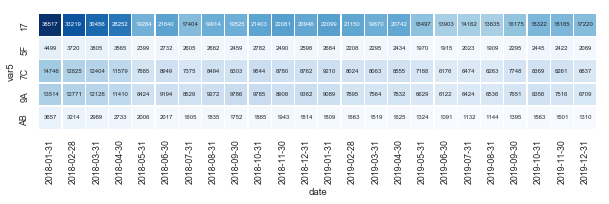

var6


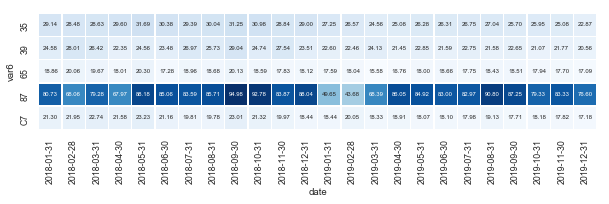

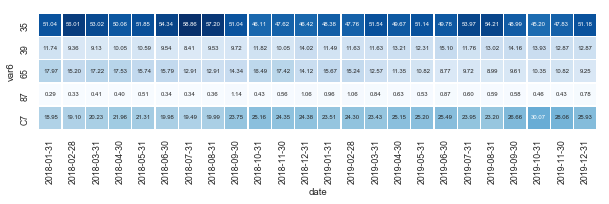

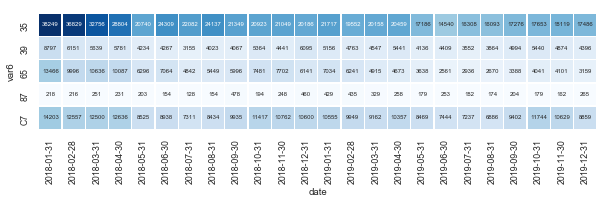

var8


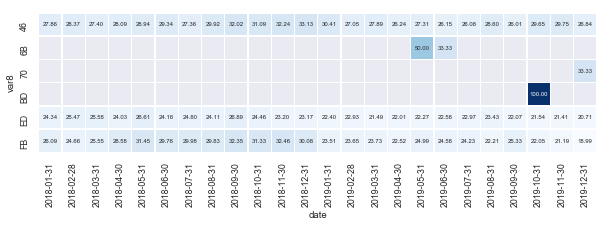

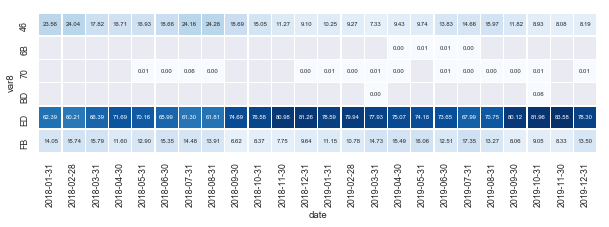

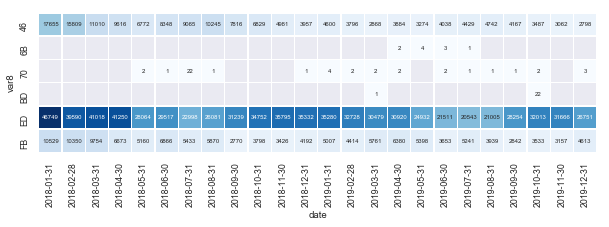

In [2]:
import pandas as pd
import polar as pl
from pptx import Presentation
%matplotlib inline

url = "https://raw.githubusercontent.com/pparkitn/imagehost/master/ACA_date.csv"
data_df=pd.read_csv(url)

Chart_list = pl.ACA_create_graphs(data_df,'date','label')
prs = Presentation()    
pl.create_title(prs,'ACA')
for chart in pl.ACA_create_graphs(data_df,'date','label'):
    pl.add_chart_slide(prs,chart[0],chart[1])
pl.save_presentation(prs,filename = 'ACA')

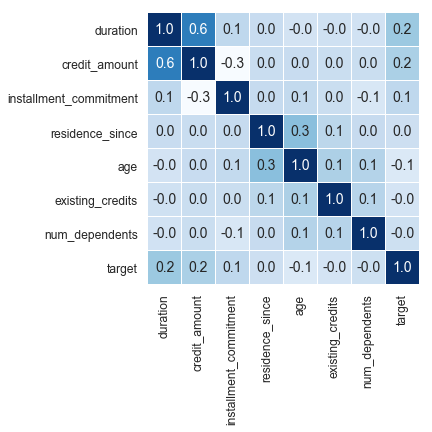

In [3]:
import pandas as pd
import openml
import polar as pl

dataset = openml.datasets.get_dataset(31)
X, y, categorical_indicator, attribute_names = \
dataset.get_data(target=dataset.default_target_attribute,dataset_format='dataframe')

openml_df = pd.DataFrame(X)
openml_df['target'] = y

data_df = pl.analyze_correlation(openml_df,'target')
pl.get_heatmap(data_df,'heat_map_1.jpg',1.1,14,'0.1f',0,600,5,5)

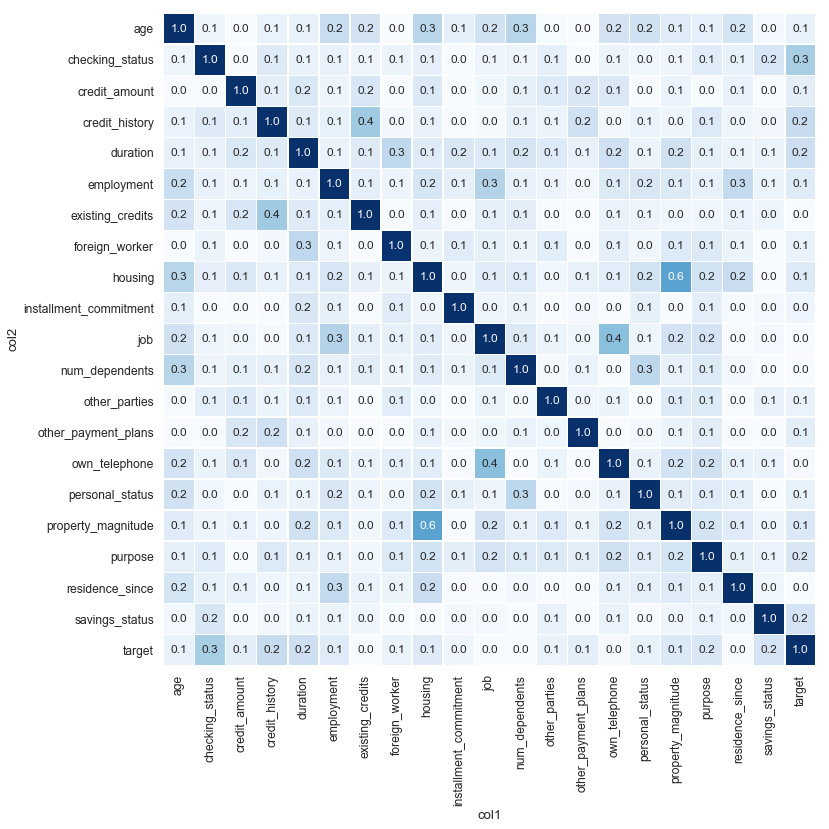

In [4]:
data_df = pl.analyze_association(openml_df,'target',verbose=0)
pl.get_heatmap(data_df,'heat_map_2.jpg',1.1,12,'0.1f')

In [5]:
print(pl.analyze_df(openml_df, 'target',10))

(            var_name  target  TotalSize      good       bad  \
0       10.0-To-12.0     216      0.216  0.759259  0.240741   
1       13.0-To-18.0     187      0.187  0.700535  0.299465   
2       20.0-To-24.0     224      0.224  0.705357  0.294643   
3       26.0-To-36.0     143      0.143  0.601399  0.398601   
4       39.0-To-72.0      87      0.087  0.482759  0.517241   
5         4.0-To-9.0     143      0.143  0.832168  0.167832   
0   1271.0-To-1494.0     101      0.101  0.742574  0.257426   
1   1495.0-To-1922.0     101      0.101  0.762376  0.237624   
2   1924.0-To-2329.0     101      0.101  0.722772  0.277228   
3   2331.0-To-2899.0     101      0.101  0.762376  0.237624   
4     250.0-To-932.0     101      0.101  0.693069  0.306931   
5   2901.0-To-3617.0     101      0.101  0.782178  0.217822   
6   3620.0-To-4843.0     101      0.101  0.673267  0.326733   
7   4844.0-To-7418.0     101      0.101  0.643564  0.356436   
8  7432.0-To-18424.0      90      0.090  0.500000  0.5

using RandomForestClassifier


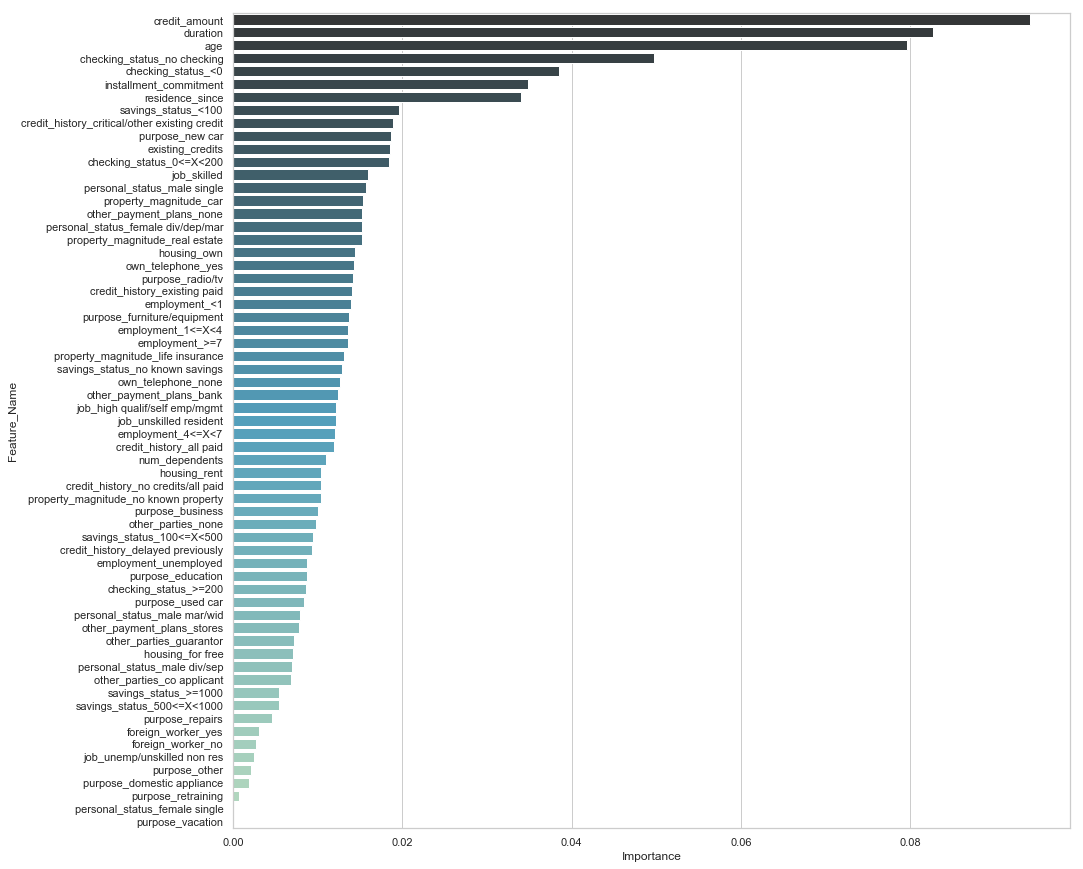

In [6]:
data_df = pl.get_important_features(openml_df,'target')
pl.get_bar(data_df,'bar.jpg','Importance','Feature_Name')

In [7]:
import pandas as pd
import polar as pl
from cryptography.fernet import Fernet

url = "https://raw.githubusercontent.com/pparkitn/imagehost/master/test_real_or_not_from_kaggle.csv"
data_df=pd.read_csv(url)

data_df.drop(columns=['id','keyword','location'], inplace=True)
data_df.head(3)

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."


In [8]:
key = Fernet.generate_key()
data_df['text_encrypted'] =  data_df['text'].apply(pl.encrypt_df,args=(key,))
data_df['text_decrypted'] =  data_df['text_encrypted'].apply(pl.decrypt_df,args=(key,))

data_df['text_stem'] = data_df['text_decrypted'].apply(pl.nlp_text_process,args=('stem',))
data_df['text_stem_lem'] = data_df['text_stem'].apply(pl.nlp_text_process,args=('lem',))

data_df.head(3)

,text,text_encrypted,text_decrypted,text_stem,text_stem_lem
0,Just happened a terrible car crash,gAAAAABeMfJwiQEZNFaWLbu0vcnz9N1oEOWVQg4_4J0e5X...,Just happened a terrible car crash,just happen a terribl car crash,just happen a terribl car crash
1,"Heard about #earthquake is different cities, s...",gAAAAABeMfJwqoVAkKxNE-JmVCfSSFtH5Q6MIRhbGOw9h1...,"Heard about #earthquake is different cities, s...","heard about #earthquak is differ cities, stay...","heard about #earthquak is differ cities, sta..."
2,"there is a forest fire at spot pond, geese are...",gAAAAABeMfJwKdEJaGm4JPCB-JUKVi_HZtVtBoDynmfHWI...,"there is a forest fire at spot pond, geese are...","there is a forest fire at spot pond, gees are...","there is a forest fire at spot pond, gee are..."


In [9]:
cluster_df = pl.nlp_cluster(data_df,cluster_column = 'text_stem_lem', clusters = 10, prediction_col = 'text_cluster',max_df_val = 1.0,min_df_val = 1,max_iter_val=100 , n_init_val = 1 )
cluster_df.groupby(['text_cluster']).count()

C:\Users\peter.parkitny\AppData\Local\Continuum\anaconda3\lib\site-packages\polar\polar.py:620: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  ALL_DF = pd.concat([predictions_df,data_df],axis=1,join_axes=[predictions_df.index])


,text,text_encrypted,text_decrypted,text_stem,text_stem_lem
text_cluster,,,,,
0,179,179,179,179,179
1,33,33,33,33,33
2,303,303,303,303,303
3,198,198,198,198,198
4,1055,1055,1055,1055,1055
5,131,131,131,131,131
6,1083,1083,1083,1083,1083
7,82,82,82,82,82
8,81,81,81,81,81


In [10]:
cluster_df[cluster_df['text_cluster']==9]['text_stem_lem']

87        the bartend at work describ a drunk man a an...
131       @tmfk_co sound like a terribl time. i'll be ...
132       apocalyps no! whi artist should not go into ...
170       @pnuts_mama Be strong. it' at time like thi ...
271       Is it time to hedg against catastroph risk s...
                              ...                        
3183      @t_litt44 I seen you that one day look like ...
3184      great time group camp at presqu'il with fami...
3210      time heal all wounds. and if it doesn't you ...
3249      @thrillhho jsyk I haven't stop think abt rem...
3254      officials: alabama home quarantin over possi...
Name: text_stem_lem, Length: 118, dtype: object